## Tabu Search TSP
Tabu search is a meta heuristic search algorithm that utilize the idea of having short term memory to avoid sticking in a local minima. It has been used in many applications one of them is Traveling Salesman Problem. Speaking about TSP it worth to mention that the best reported algorithm to solve it is guided local search algorithm.

In [1]:
import copy 
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_random_data(n):
    data = np.random.rand(2,n)*1000
    plt.scatter(data[0], data[1])
    plt.title('The location of {} cities'.format(n))
    plt.show()
    return data

In [3]:
def create_data_array(data):
    x_cord = data[0]
    y_cord = data[1]
    data_arr = [0]*n
    for i in range(0,len(data_arr)):
        sub_list = [0]*2
        sub_list[0] = x_cord[i]
        sub_list[1] = y_cord[i]
        data_arr[i] = sub_list
    data_arr = np.array(data_arr)
    return data_arr

In [4]:
#Calculate the distance matrix 
def distance_cal(data):
    dis_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dis = np.sqrt((data[i,0] - data[j,0])**2 + (data[i,1] - data[j,1])**2)
            dis_matrix[i,j] = dis
            dis_matrix[j,i] = dis
    return dis_matrix

In [5]:
def generate_neighbours(distance_arr):
    """This function is to generate a dictionary with the neighbours of all nodes"""
    dict_of_neighbours = {}
    for i in range(len(distance_arr)):
        for j in range(i+1, len(distance_arr)):
            if i not in dict_of_neighbours:
                dict_of_neighbours[i] = {}
                dict_of_neighbours[i][j] = distance_arr[i][j]
            else:
                dict_of_neighbours[i][j] = distance_arr[i][j]
            if j not in dict_of_neighbours:
                dict_of_neighbours[j] = {}
                dict_of_neighbours[j][i] = distance_arr[j][i]
            else:
                dict_of_neighbours[j][i] = distance_arr[j][i]
    return dict_of_neighbours

In [6]:
def generate_init_solution(n, dict_of_neighbours):
    nodes = list(range(0,n))
    start_node = nodes[0]
    end_node = start_node
    first_solution = []
    distance_of_first_solution = 0
    visiting = start_node
    pre_node = None
    k = 0
    while k < (len(nodes)-1):
        _tmp = copy.deepcopy(dict_of_neighbours[visiting])
        _tmp.pop(pre_node, None)
        for i in first_solution:
            _tmp.pop(i, None)
        next_node = min(_tmp.items(), key = lambda x: x[1])[0]
        distance_of_first_solution += dict_of_neighbours[visiting][next_node]
        first_solution.append(visiting)
        pre_node = visiting
        visiting = next_node
        k = k + 1
    first_solution.append(visiting)
    first_solution.append(end_node)
    distance_of_first_solution += dict_of_neighbours[pre_node][end_node]
    return first_solution, distance_of_first_solution

In [440]:
def find_neighbourhoods(solution, dict_of_neighbours, n_opt = 1):
    neighbourhood_of_solution = []
    for n in solution[1:-n_opt]:
        idx1 = []
        n_index = solution.index(n)
        for i in range(n_opt):
            idx1.append(n_index + i)
        for kn in solution[1:-n_opt]:
            idx2 = []
            kn_index = solution.index(kn)
            for i in range(n_opt):
                idx2.append(kn_index + i)
            if bool(
                set(solution[idx1[0] : (idx1[-1] + 1)]) &
                set(solution[idx2[0] : (idx2[-1] + 1)])):
                
                continue
            _tmp = copy.deepcopy(solution)
            for i in range(n_opt):
                _tmp[idx1[i]] = solution[idx2[i]]
                _tmp[idx2[i]] = solution[idx1[i]]
            distance = 0
            for k in _tmp[:-1]:
                next_node = _tmp[_tmp.index(k) + 1]
                distance = distance + dict_of_neighbours[k][next_node]
            _tmp.append(distance)
            if _tmp not in neighbourhood_of_solution:
                neighbourhood_of_solution.append(_tmp)
    last_index = len(neighbourhood_of_solution[0]) - 1
    neighbourhood_of_solution.sort(key = lambda x: x[last_index])
    return neighbourhood_of_solution

In [487]:
#Tabu Search Algorithm 
def tabu_search(first_solution, distance_of_first_solution, dict_of_neighbours, inters, size, n_opt = 1):
    count = 1
    solution = first_solution
    tabu_list = list()
    best_cost = distance_of_first_solution
    best_solution_ever = solution
    while count <= iters:
        neighbourhood = find_neighbourhoods(solution, dict_of_neighbours, n_opt = n_opt)
        index_of_best_solution = 0
        best_solution = neighbourhood[index_of_best_solution]
        best_cost_index = len(best_solution) - 1
        found = False
        while found is False:
            i = 0
            first_exchange_node, second_exchange_node = [], []
            n_opt_counter = 0
            while i < len(best_solution):
                if best_solution[i] != solution[i]:
                    first_exchange_node.append(best_solution[i])
                    second_exchange_node.append(solution[i])
                    n_opt_counter += 1
                    if n_opt_counter == n_opt:
                        break
                i = i + 1
            exchange = first_exchange_node + second_exchange_node
            if first_exchange_node + second_exchange_node not in tabu_list and second_exchange_node + first_exchange_node not in tabu_list:
                tabu_list.append(exchange)
                found = True
                solution = best_solution[:-1]
                cost = neighbourhood[index_of_best_solution][best_cost_index]
                if cost < best_cost:
                    best_cost = cost
                    best_solution_ever = solution
            elif index_of_best_solution < len(neighbourhood):
                best_solution = neighbourhood[index_of_best_solution]
                index_of_best_solution = index_of_best_solution + 1
            
        while len(tabu_list) > size:
            tabu_list.pop(0)
        count = count + 1
    return best_solution_ever, best_cost

In [480]:
def generate_optimal_route(best_solution_ever):
    x0 = best_solution_ever
    x_x0 = [0]*(len(x0)+1)
    y_x0 = [0]*(len(x0)+1)
    for i in range(len(x0)):
        x_x0[i] = data_arr[x0[i],0]
        y_x0[i] = data_arr[x0[i],1]
        x_x0[-1] = data_arr[x0[0],0]
        y_x0[-1] = data_arr[x0[0],1]
    plt.plot(x_x0, y_x0, linestyle = 'solid', marker = 'o')
    plt.title('Optimal route')
    for i in range(len(x0)):
        plt.text(x_x0[i] + 2, y_x0[i],str(x0[i]))
    plt.show()
    breakpoint()

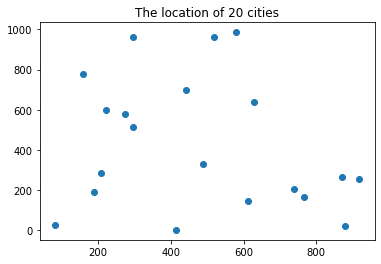

Initial solution is:  [0, 15, 17, 12, 18, 4, 5, 11, 6, 1, 3, 14, 16, 9, 2, 10, 13, 8, 7, 19, 0]
Length route of initial solution:  4624.071228609798
Final solution is: [0, 15, 17, 12, 18, 4, 11, 1, 3, 14, 6, 5, 16, 10, 9, 2, 7, 19, 8, 13, 0]
Objective value is: 4329.271207176411


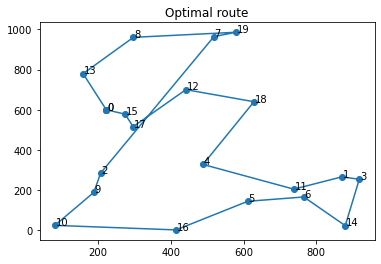

In [492]:
n = 20
np.random.seed(5)
data = create_random_data(n)
data_arr = create_data_array(data)
distance_arr = distance_cal(data_arr)
dict_of_neighbours = generate_neighbours(distance_arr)
first_solution, distance_of_first_solution = generate_init_solution(n, dict_of_neighbours)
print('Initial solution is: ', first_solution)
print('Length route of initial solution: ', distance_of_first_solution)
neighbourhood_of_solution = find_neighbourhoods(first_solution, dict_of_neighbours, n_opt = 1)
inters = 1000
size = 10

best_solution_ever, best_cost = tabu_search(first_solution, distance_of_first_solution, dict_of_neighbours, inters, size, n_opt = 1)
    
#Print the solution
print('Final solution is:', best_solution_ever)
print('Objective value is:', best_cost)
    
generate_optimal_route(best_solution_ever)